<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-test Split and Cross-Validation Lab

---

## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can use the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Fold cross-validation:**
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different K-splits of the data for the same models.

Try a variety of response variables. Start with **MEDV** (the `.target` attribute from the dataset load method).

In [10]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import KFold

In [12]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

In [13]:
# A:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

### 1. Clean up any data problems

Load the Boston housing data.  Fix any problems, if applicable.

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on

- Use sklearn.
- Score and plot your predictions.

In [15]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(11, 7))

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

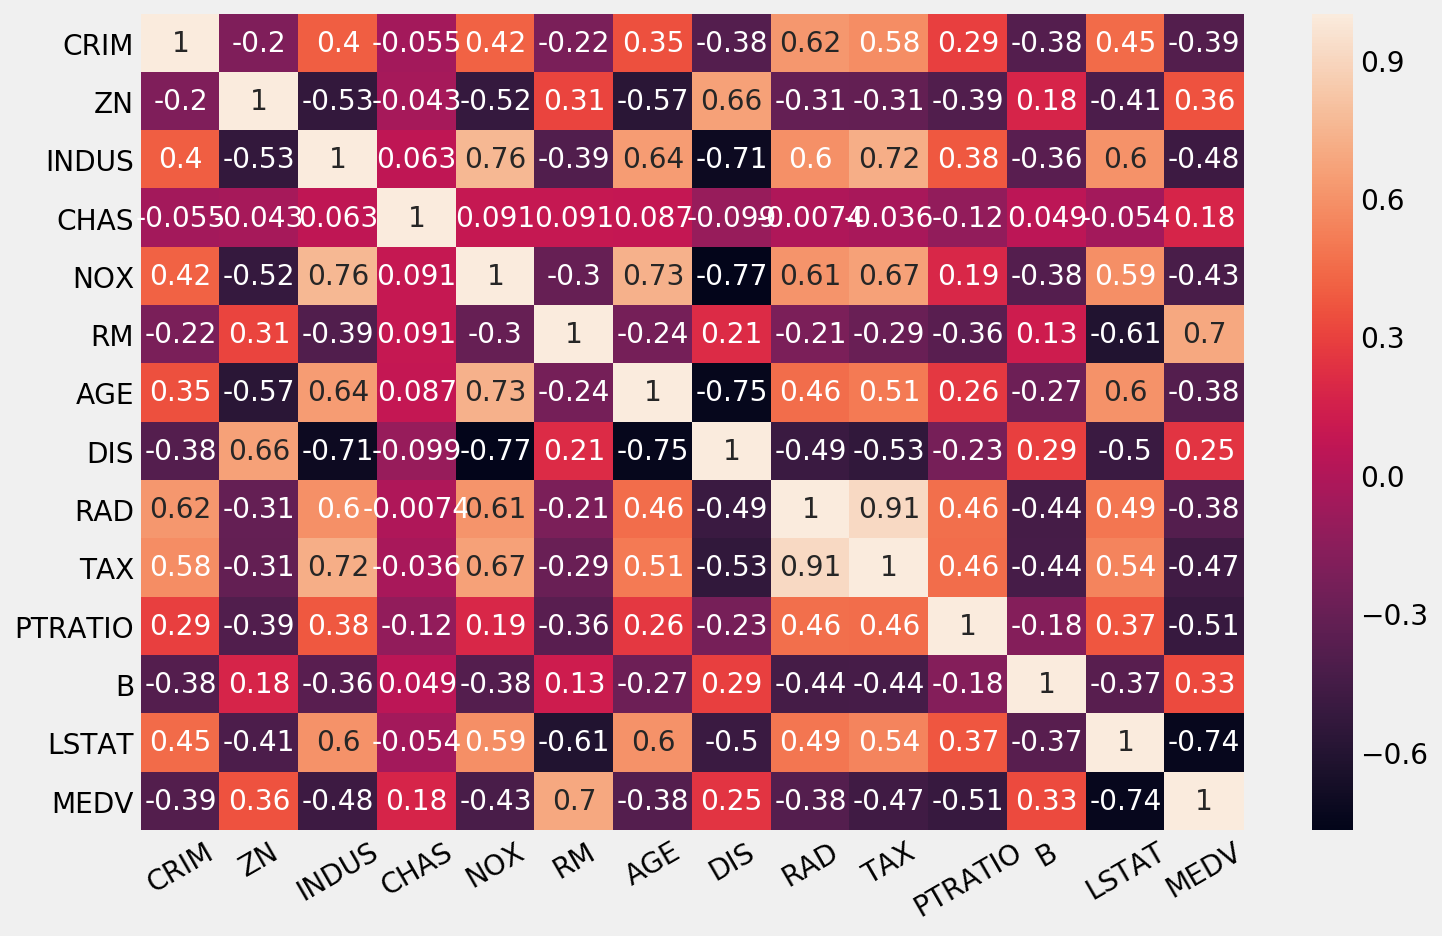

In [16]:
df_without_target = df.copy()
df_with_target['MEDV'] = y
correlation_heat_map(df_with_target)

In [19]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [20]:
# A:

# determaind the values
predictors = ['CRIM', 'RM', 'B', 'LSTAT']

X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, train_size=0.5, random_state=8)


model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.6635575722188753

/Users/jasmine/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jasmine/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


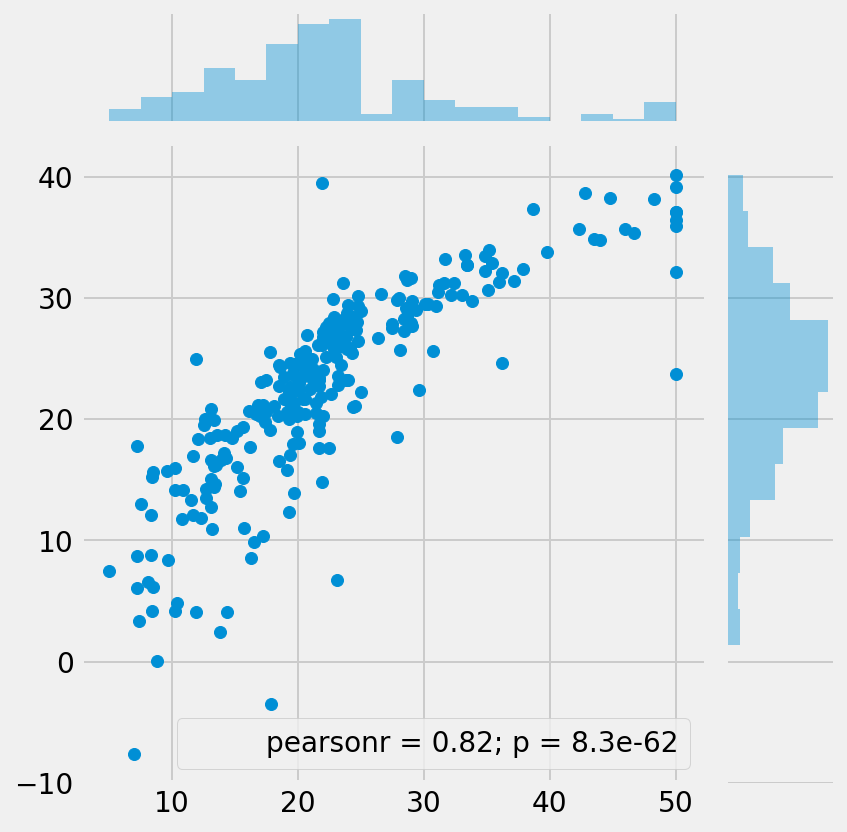

In [22]:
yhat = model.predict(X_test)
sns.jointplot(y_test, yhat);

### 3. Try 70/30 and 90/10
- Score and plot.  
- How do your metrics change?

In [23]:
# 70/30
X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, train_size=0.7, random_state=8)



model.fit(X_train,y_train)
model.score(X_test, y_test)

/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.6161800060984299

/Users/jasmine/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jasmine/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


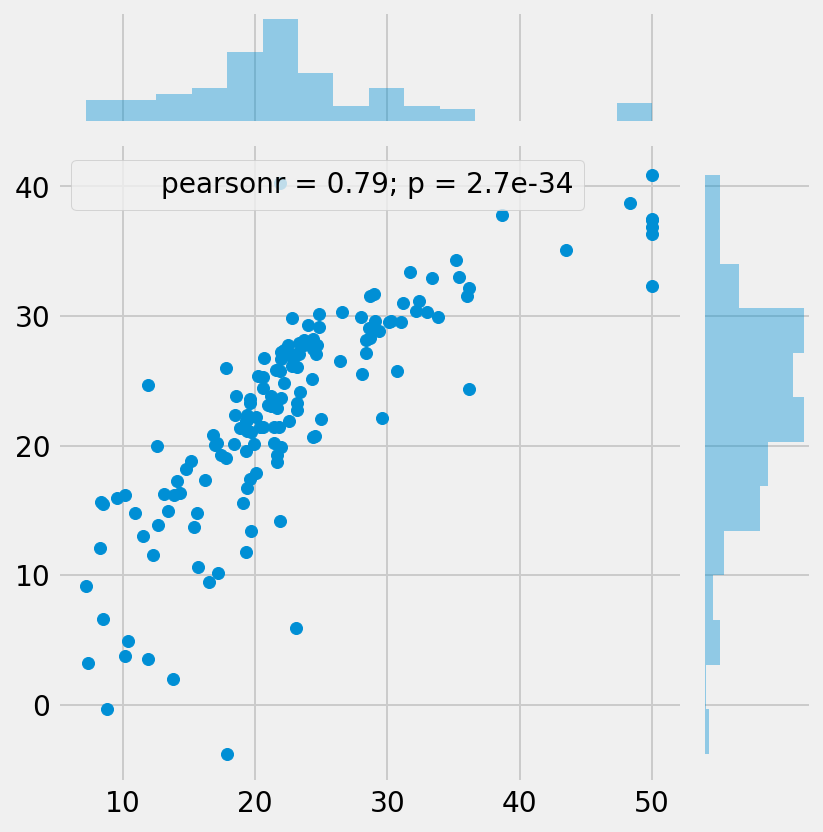

In [25]:
yhat = model.predict(X_test)
sns.jointplot(y_test, yhat);

In [26]:
# 90/10
X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, train_size=0.9, random_state=8)


model.fit(X_train,y_train)
model.score(X_test, y_test)

/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.5839244756380991

/Users/jasmine/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jasmine/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


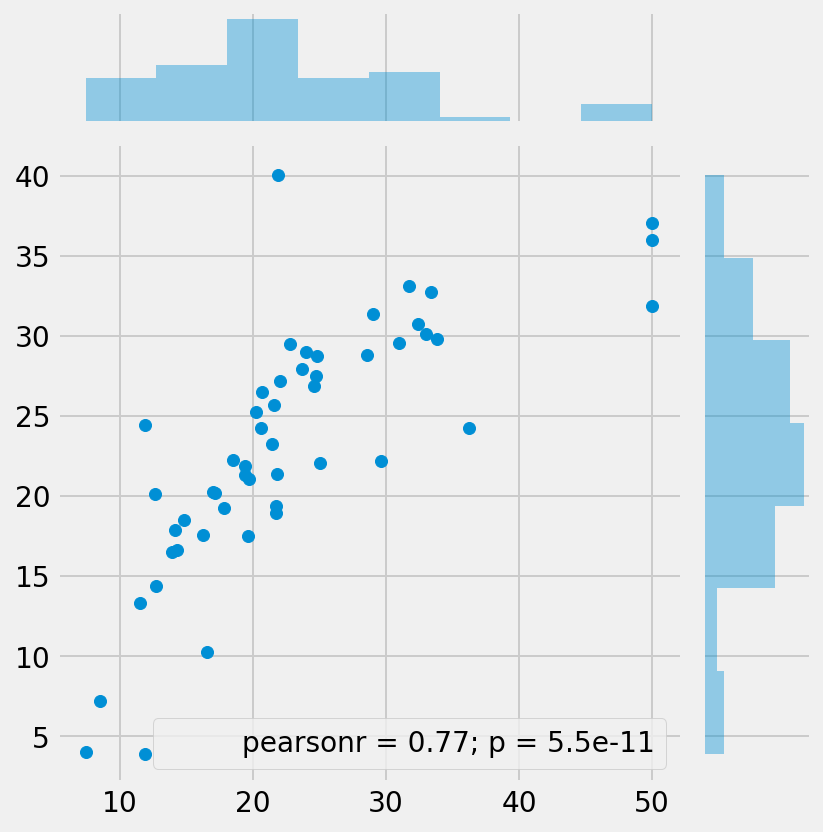

In [28]:
yhat = model.predict(X_test)
sns.jointplot(y_test, yhat);

### 4. Try K-Fold cross-validation with K between 5-10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What is the variance of scores like?
- Try different folds to get a sense of how this impacts your score.

In [29]:
for folds in range(5,11):
    print()
    print('K: ',(folds))
    model = LinearRegression()
    
    # cross-validation with scores and mean scores
    scores = cross_val_score(model, X[predictors], y, cv=folds)
    print("Cross-validated scores: ", scores )
    print("Mean CV R2: ", np.mean(scores))
    print('Std CV R2: ', np.std(scores))
    
    # cross-validated predictions and R2
    predictions = cross_val_predict(model, X[predictors], y, cv=folds)
    
    r2 = metrics.r2_score(y, predictions)
    print("Cross-Predicted R2: ", (r2))


K:  5
Cross-validated scores:  [ 0.64631693  0.70482771  0.44121527  0.08620083 -0.50525881]
Mean CV R2:  0.2746603856925381
Std CV R2:  0.44602780437750605
Cross-Predicted R2:  0.5173431725227886

K:  6
Cross-validated scores:  [ 0.60617609  0.70748062  0.52005295  0.6187581  -0.31575052 -0.22205816]
Mean CV R2:  0.319109846990915
Std CV R2:  0.4201818237155568
Cross-Predicted R2:  0.4798654514852586

K:  7
Cross-validated scores:  [ 0.6551403   0.59539945  0.53563504  0.49472098  0.24503727 -0.64989835
  0.11581191]
Mean CV R2:  0.284549513906404
Std CV R2:  0.42163077886172773
Cross-Predicted R2:  0.43146848335882704

K:  8
Cross-validated scores:  [ 0.67247147  0.61771501  0.68493632  0.61008211  0.58758257 -0.28401756
 -1.07692607  0.03328161]
Mean CV R2:  0.23064068275696042
Std CV R2:  0.5954371664928719
Cross-Predicted R2:  0.5805843328702167

K:  9
Cross-validated scores:  [ 0.69100518  0.6025288   0.68881703  0.45761742  0.56596941  0.60141937
 -0.05866307 -0.84532542  0.082

### 5. [Bonus] Optimize the $R^2$ score

Can you optimize your $R^2$ by selecting the best features and validating the model using either train/test split or K-Folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of K-folds is up to you.

> *Hint:* the `itertools` package is useful for combinations and permutations.


In [30]:
# A: 
from itertools import combinations

In [31]:
combs = []
for i in range(1, len(X.columns)+1):
    for c in combinations(X.columns.tolist(), i):
        combs.append(c)

In [32]:
linreg = LinearRegression()

R2_results = {}
for i,c in enumerate(combs):
    if (i % 250) == 0:
        print(i)
        
    subX = X[list(c)]
    R2_results[c] = np.mean(cross_val_score(linreg, subX, y))

0
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750
5000
5250
5500
5750
6000
6250
6500
6750
7000
7250
7500
7750
8000


### 5.1 Can you explain what could be wrong with this approach?

In [ ]:
# A: it's "brute force" which take time to calucate

### 6. [Bonus] Explore another target variable and practice `patsy` formulas

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this dataset?

**Try out using patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and pearson scores.*

In [33]:
import patsy

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

df = X.copy()

df['MEDV'] = y

In [34]:
y, X = patsy.dmatrices("LSTAT ~ AGE + RM + MEDV", data=df, return_type="dataframe")

y = y.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [36]:


lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: ", metrics.r2_score(y_test, predictions))

R^2 Score:  0.7428486616896939
